## Contents

- [Abstract](index.html)
- [Project Motivation](motivation.html)
- [Biological & Theoretical Background](background.html)
- [Model Structure](structure.html)
- [Usage](usage.html)
- [First Steps: Pyro](pyro.html)
- [Model Reconstruction](model.html)
- [Performance Comparison](performance.html)
- [Conclusions](conclusions.html)

# Performance Comparison

Here, we compare the performance of the original Theano model to the new constructed PyTorch model. For this, there are three example protein datasets. The three proteins differ in function, structure and species of origin, they are: Beta-Lactamase from E. coli, DLG4/PSD-95 protein from rat, and PABP from yeast. For each of these proteins, there is experimental deep mutational scan data with which to compare model predictions.

First we can examine loss curves for these proteins, before looking at run-time and finally the Spearman R correlation coefficient of model predictions with experimental data.

Due to time constraints, I was not able to run the original Theano model for all model settings considered - as such, performance is compared against the quoted values from the original paper, found [here](https://arxiv.org/pdf/1712.06527.pdf).

# Loss Across Updates

To examine how loss changes through updates with the two models, we compare the 'full' form of the model; stochastic variational decoder with output convolution, sparsity and a temperature parameter. The settings for the models were kept the same, and each component of the total loss was recorded every 100 updates.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = "../data/theano_outputs/theano_svi_BLAT.out"
theanoblatfile = open(path, "r")
theano_blat = theanoblatfile.readlines()[49:]
TB_epochs = [int(line.split()[1].replace(",","")) for line in theano_blat]
TB_LB = [float(line.split()[5].replace(",","")) for line in theano_blat]
TB_params = [float(line.split()[7].replace(",","")) for line in theano_blat]
TB_latent = [float(line.split()[10].replace(",","")) for line in theano_blat]
TB_recon = [float(line.split()[12].replace(",","")) for line in theano_blat]

In [3]:
path = "../data/theano_outputs/theano_svi_DLG4.out"
theanodlgfile = open(path,'r')
theano_dlg4 = theanodlgfile.readlines()[49:]
TD_epochs = [int(line.split()[1].replace(",","")) for line in theano_dlg4]
TD_LB = [float(line.split()[5].replace(",","")) for line in theano_dlg4]
TD_params = [float(line.split()[7].replace(",","")) for line in theano_dlg4]
TD_latent = [float(line.split()[10].replace(",","")) for line in theano_dlg4]
TD_recon = [float(line.split()[12].replace(",","")) for line in theano_dlg4]

In [188]:
path = "../data/theano_outputs/theano_svi_PABP.out"
theanopabfile = open(path,'r')
theano_pabp = theanopabfile.readlines()[49:]
TP_epochs = [int(line.split()[1].replace(",","")) for line in theano_pabp]
TP_LB = [float(line.split()[5].replace(",","")) for line in theano_pabp]
TP_params = [float(line.split()[7].replace(",","")) for line in theano_pabp]
TP_latent = [float(line.split()[10].replace(",","")) for line in theano_pabp]
TP_recon = [float(line.split()[12].replace(",","")) for line in theano_pabp]

In [186]:
path = "../data/outputs/PABP_YEAST/pab_full_svi.out"
PPfile = open(path,'r')
pt_pabp = PPfile.readlines()[18:]
PP_epochs = [int(line.split()[1].replace(".","")) for line in pt_pabp]
PP_LB = [float(line.split()[4].replace(",","")) for line in pt_pabp]
PP_params = [float(line.split()[6].replace(",","")) for line in pt_pabp]
PP_latent = [float(line.split()[8].replace(",","")) for line in pt_pabp]
PP_recon = [float(line.split()[10].replace(",","")) for line in pt_pabp]

In [185]:
path = "../data/outputs/BLAT_ECOLX/fullsvi_first.out"
PBfile = open(path,'r')
pt_blat = PBfile.readlines()[18:]
PB_epochs = [int(line.split()[1].replace(".","")) for line in pt_blat]
PB_LB = [float(line.split()[4].replace(",","")) for line in pt_blat]
PB_params = [float(line.split()[6].replace(",","")) for line in pt_blat]
PB_latent = [float(line.split()[8].replace(",","")) for line in pt_blat]
PB_recon = [float(line.split()[10].replace(",","")) for line in pt_blat]

In [5]:
path = "../data/outputs/DLG4_RAT/dlg_full_svi.out"
ptdlgfile = open(path,'r')
pt_dlg4 = ptdlgfile.readlines()[18:]
PD_epochs = [int(line.split()[1].replace(".","")) for line in pt_dlg4]
PD_LB = [float(line.split()[4].replace(",","")) for line in pt_dlg4]
PD_params = [float(line.split()[6].replace(",","")) for line in pt_dlg4]
PD_latent = [float(line.split()[8].replace(",","")) for line in pt_dlg4]
PD_recon = [float(line.split()[10].replace(",","")) for line in pt_dlg4]

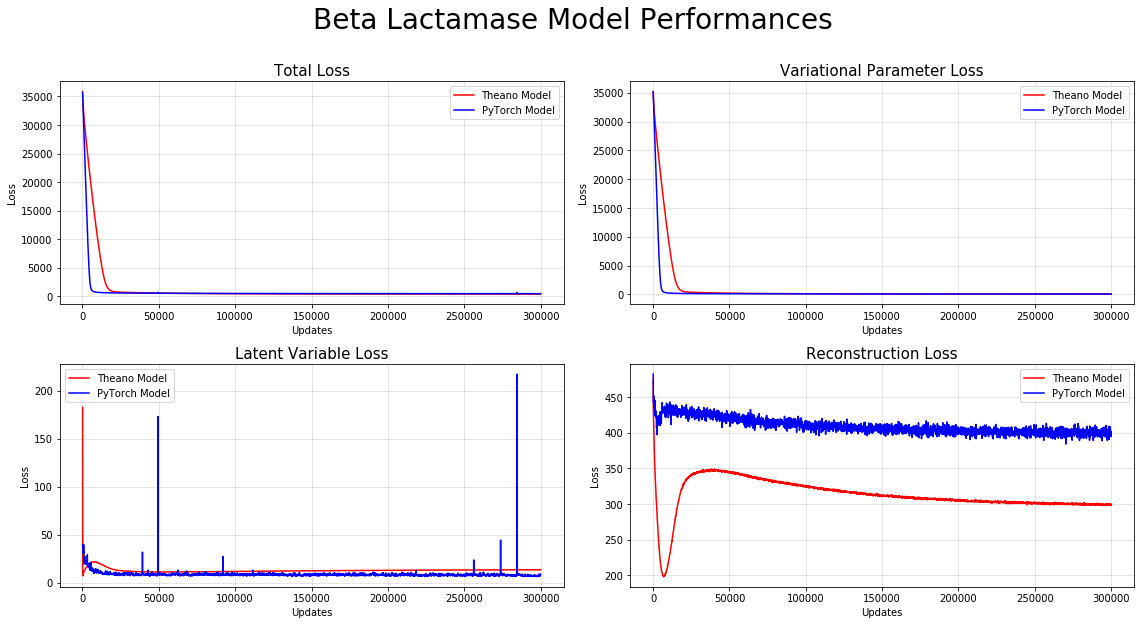

In [38]:
plt.figure(figsize=(16,8))
plt.suptitle("Beta Lactamase Protein Model Performances", fontsize=28, y=1.08)
plt.subplot(2,2,1)
plt.plot(TB_epochs,-np.array(TB_LB), color='r', label="Theano Model")
plt.plot(PB_epochs,np.array(PB_LB), color='b', label='PyTorch Model')
plt.legend()
plt.title("Total Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.subplot(2,2,2)
plt.plot(TB_epochs,-np.array(TB_params), color='r', label="Theano Model")
plt.plot(PB_epochs,-np.array(PB_params), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Variational Parameter Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,3)
plt.plot(TB_epochs,-np.array(TB_latent), color='r', label="Theano Model")
plt.plot(PB_epochs,-np.array(PB_latent), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Latent Variable Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,4)
plt.plot(TB_epochs,-np.array(TB_recon), color='r', label="Theano Model")
plt.plot(PB_epochs,-np.array(PB_recon), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Reconstruction Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()

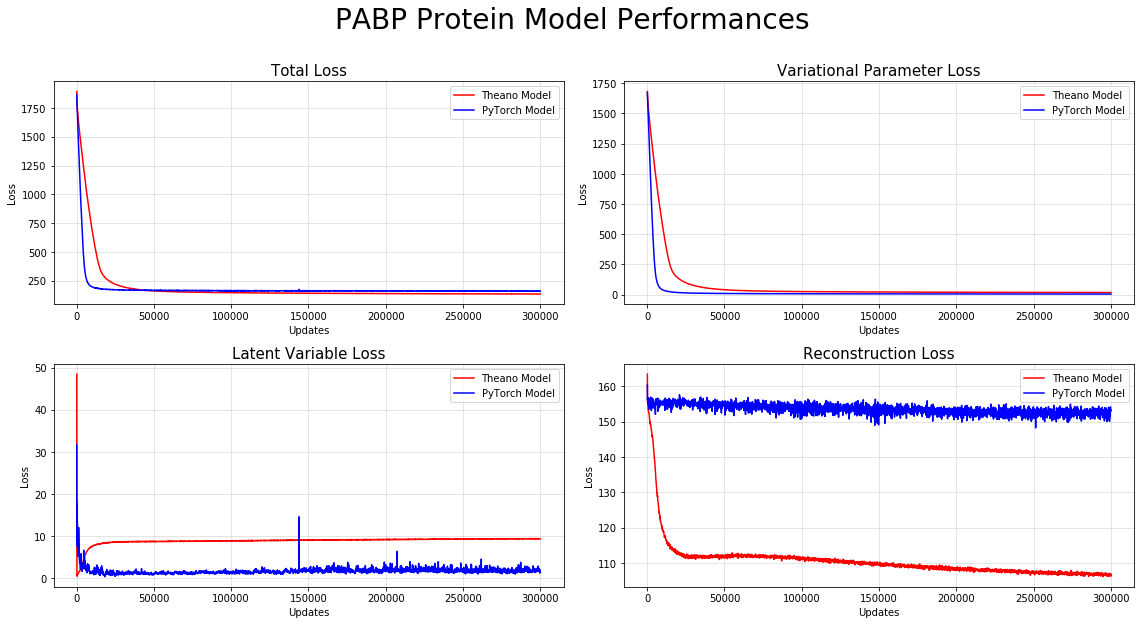

In [189]:
plt.figure(figsize=(16,8))
plt.suptitle("PABP Protein Model Performances", fontsize=28, y=1.08)
plt.subplot(2,2,1)
plt.plot(TP_epochs,-np.array(TP_LB), color='r', label="Theano Model")
plt.plot(PP_epochs,np.array(PP_LB), color='b', label='PyTorch Model')
plt.legend()
plt.title("Total Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.subplot(2,2,2)
plt.plot(TP_epochs,-np.array(TP_params), color='r', label="Theano Model")
plt.plot(PP_epochs,-np.array(PP_params), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Variational Parameter Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,3)
plt.plot(TP_epochs,-np.array(TP_latent), color='r', label="Theano Model")
plt.plot(PP_epochs,-np.array(PP_latent), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Latent Variable Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,4)
plt.plot(TP_epochs,-np.array(TP_recon), color='r', label="Theano Model")
plt.plot(PP_epochs,-np.array(PP_recon), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Reconstruction Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()

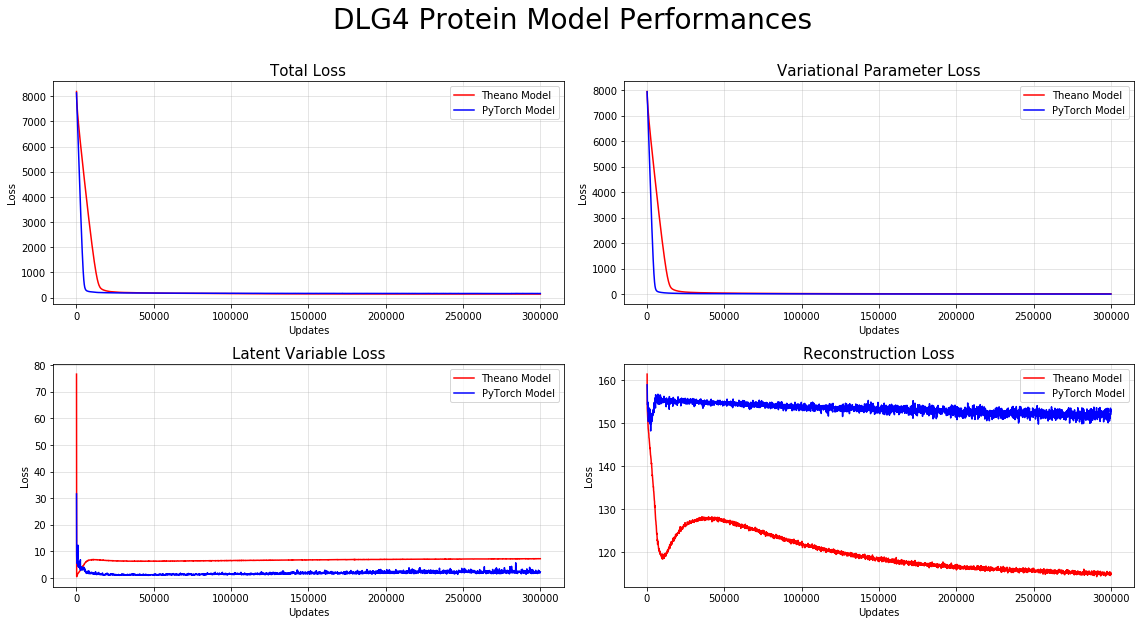

In [39]:
plt.figure(figsize=(16,8))
plt.suptitle("DLG4 Protein Model Performances", fontsize=28, y=1.08)
plt.subplot(2,2,1)
plt.plot(TD_epochs,-np.array(TD_LB), color='r', label="Theano Model")
plt.plot(PD_epochs,np.array(PD_LB), color='b', label='PyTorch Model')
plt.legend()
plt.title("Total Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.subplot(2,2,2)
plt.plot(TD_epochs,-np.array(TD_params), color='r', label="Theano Model")
plt.plot(PD_epochs,-np.array(PD_params), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Variational Parameter Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,3)
plt.plot(TD_epochs,-np.array(TD_latent), color='r', label="Theano Model")
plt.plot(PD_epochs,-np.array(PD_latent), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Latent Variable Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,4)
plt.plot(TD_epochs,-np.array(TD_recon), color='r', label="Theano Model")
plt.plot(PD_epochs,-np.array(PD_recon), color='b', label='PyTorch Model')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Reconstruction Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()

It is clear that both models are successfully optimizing to similar total loss values for each protein, however the individual loss components behave differently between models in a manner that is consistent across proteins. The loss value for the KLD variational loss parameters is more rapidly optimized in the PyTorch model, the latent variable loss achieves a marginally lower value, whilst the reconstruction loss fails to reach as low a value, and is subject to considerably more fluctuation.

Some possible consequences of this difference in performance will be considered below.

# Model Speed

Every 100 epochs, the time since the model started running is returned. Here, we can look at the total model run time for 300,000 epochs for the different proteins using the two models. The models were run on Harvard Medical School's O2 cluster, with 4 GPUs used through CUDA. 

In [190]:
TB_time = float(theano_blat[-1].split()[-1])
TD_time = float(theano_dlg4[-1].split()[-1])
PB_time = float(pt_blat[-1].split()[-1])
PD_time = float(pt_dlg4[-1].split()[-1])
TP_time = float(theano_pabp[-1].split()[-1])
PP_time = float(pt_pabp[-1].split()[-1])

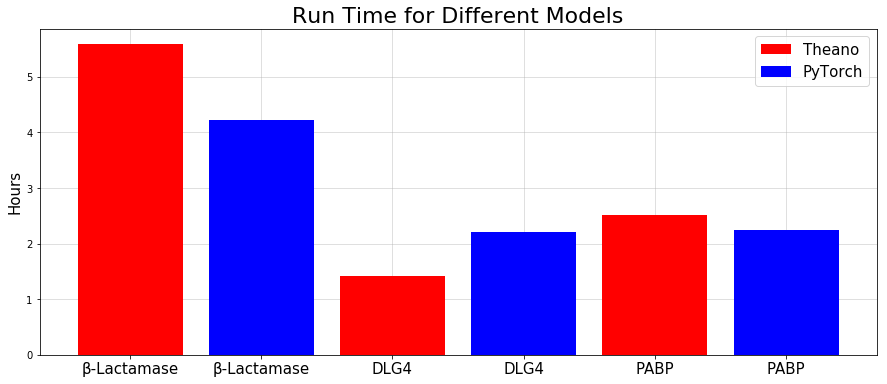

In [192]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar([1,3,5],[TB_time/(60*60),TD_time/(60*60),TP_time/(60*60)], 
        color=['r'],label='Theano')
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(('β-Lactamase','β-Lactamase','DLG4','DLG4','PABP','PABP'),fontsize=15)
ax.bar([2,4,6],[PB_time/(60*60),PD_time/(60*60),PP_time/(60*60)],  
        color=['b'],label='PyTorch')
ax.legend(fontsize=15)
plt.ylabel("Hours",fontsize=15)
plt.title("Run Time for Different Models", fontsize=22)
ax.set_axisbelow(True)
ax.grid(True,alpha=0.5)
plt.show()


It appears that the PyTorch model is on average quicker, but this is only an anecdotal observation and is not consistent across all proteins tested. Due to the length of time to it takes to run a model (the quoted times here do not include the time it takes to resource the GPU compute-time, which can also take hours), it was not possible to run these models multiple times to get a strong idea of average performance time - as such, all that one could say is that it appears that the two models run in effectively equivalent times.

Improving the runtime of the model was not a primary focus of this reconstruction, although it will certainly be an important goal in the future. The new model is well primed for speed focussed development - with PyTorch there are multiple features available that can be easily implemented to improve model speed. For example, Data Parallelism can be implemented through torch's `torch.nn.DataParallel` module. With PyTorch, one can construct a custom DataLoader class to pass data to the model in a method that is more GPU-compatible than is currently implemented (the generic dataloader cannot be used as sequences must be selected with weighted probabilities). As the development of PyTorch continues, the possibilities for greater parallelism and speedup will only increase

# Performance Against Experimental Data

Here, we compare the model predictions to experimental deep mutational scan data. The code to do so can be found [here](https://github.com/rorymaizels/AC299r/tree/master/models/running_code). Six different models were tested for each protein - three SVI and three MLE - and the results were compared to the quoted performance of the Theano model from the original paper.

Model Type Key:

* MLE: Simple MLE VAE with only L2-regularization
* MLE+D: MLE VAE with L2 and Dropout.
* MLE+D+SCT: MLE VAE with L2, Dropout, 'logit' sparsity priors, decoder convolution and temperature.
* SVI: Simple SVI VAE
* SVI+C+T: SVI VAE with decoder convolution and temperature parameter.
* SVI+C+T+S: SVI VAE with decoder convolution, temperature parameter and 'logit' sparsity priors.



In [111]:
# order: mle-basic, mle-dropout, mle-full, svi-basic, svi-convtemp, svi-full

TB_perf = [0.37, 0.56, 0.53, 0.74, 0.73, 0.73] 
TD_perf = [0.41, 0.50, 0.55, 0.55, 0.57, 0.58]
TP_perf = [0.58, 0.63, 0.64, 0.65, 0.65, 0.67]

PB_perf = [0.69, 0.69, 0.60, 0.68, 0.65, 0.65]
PD_perf = [0.55, 0.55, 0.47, 0.45, 0.48, 0.47]
PP_perf = [0.57, 0.62, 0.42, 0.41, 0.44, 0.45]

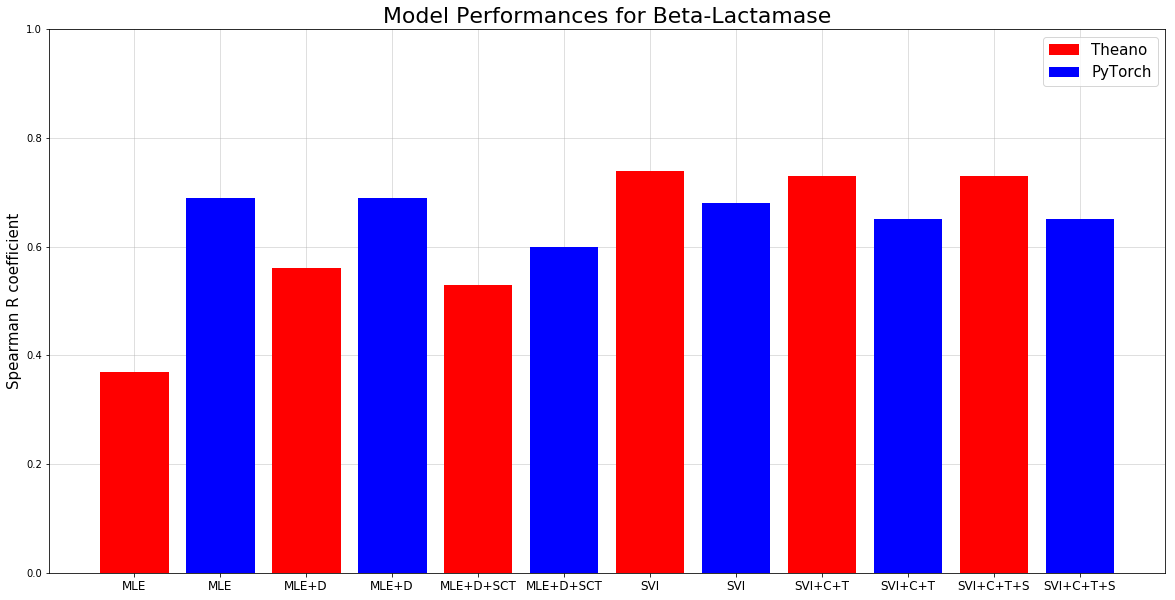

In [160]:
mods = ['MLE','MLE+D','MLE+D+SCT','SVI','SVI+C+T','SVI+C+T+S']
modind = np.array([[mod,bod] for mod,bod in zip(mods,mods)]).flatten()
ind = np.arange(1,13)
tind = [1,3,5,7,9,11]
pind = [2,4,6,8,10,12]
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(tind,TB_perf,color='r',label='Theano',zorder=1)
ax.bar(pind,PB_perf,color='b',label='PyTorch')
ax.set_ylim((0,1))
ax.set_xticks(ind)
ax.set_xticklabels(modind,fontsize=12)
ax.set_axisbelow(True)
ax.grid(True,alpha=0.5)
plt.title("Model Performances for Beta-Lactamase", fontsize=22)
plt.ylabel("Spearman R coefficient", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Here, we can see surprisingly stark differences in performance between the two model types. All forms of the MLE version of the model performs considerably better in the new model, however the SVI version in PyTorch underperforms, and the best performance of the Theano model is better than any PyTorch model. PyTorch models could only be run once each, so the degree to which stochasticity affects these results cannot be determined, however the performances of the models are quite strongly different and there the performances within MLE or SVI models appear to be correlated.

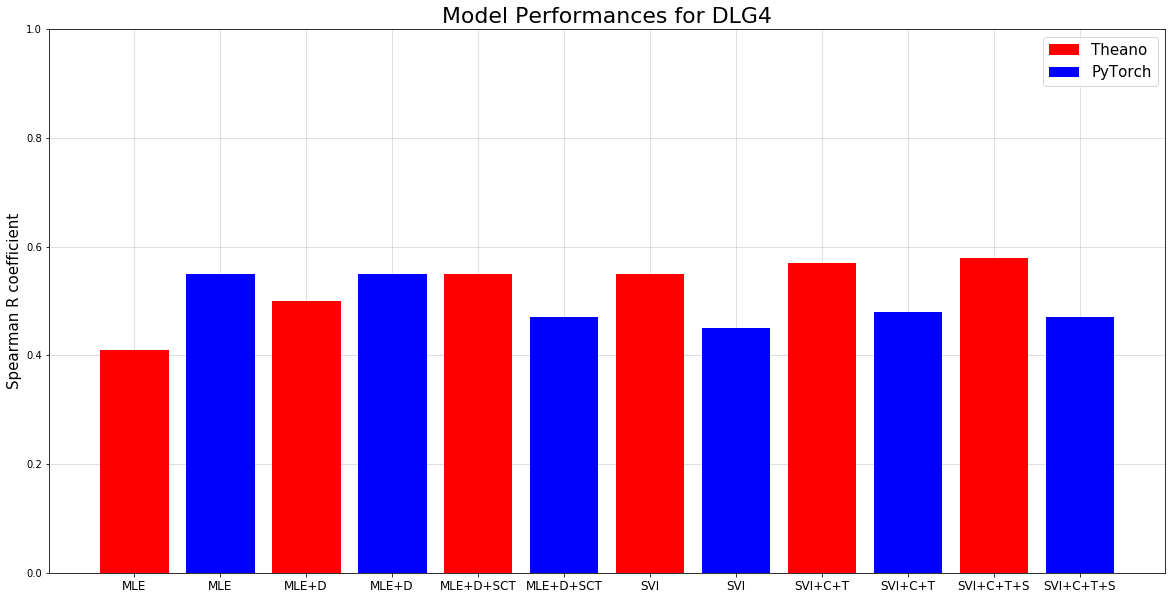

In [161]:
mods = ['MLE','MLE+D','MLE+D+SCT','SVI','SVI+C+T','SVI+C+T+S']
modind = np.array([[mod,bod] for mod,bod in zip(mods,mods)]).flatten()
ind = np.arange(1,13)
tind = [1,3,5,7,9,11]
pind = [2,4,6,8,10,12]
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(tind,TD_perf,color='r',label='Theano',zorder=1)
ax.bar(pind,PD_perf,color='b',label='PyTorch')
ax.set_ylim((0,1))
ax.set_xticks(ind)
ax.set_xticklabels(modind,fontsize=12)
ax.set_axisbelow(True)
ax.grid(True,alpha=0.5)
plt.title("Model Performances for DLG4", fontsize=22)
plt.ylabel("Spearman R coefficient", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Again, the MLE version of PyTorch models overperform, and the SVI versions underperform. The results do appear to be consistent within the two model types, as before.

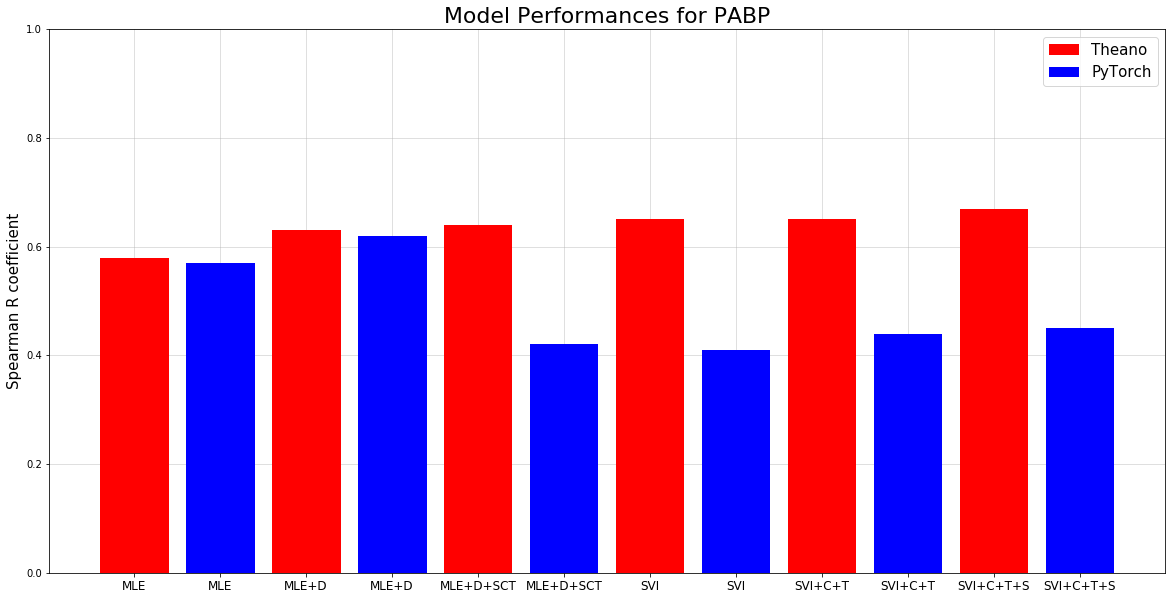

In [162]:
mods = ['MLE','MLE+D','MLE+D+SCT','SVI','SVI+C+T','SVI+C+T+S']
modind = np.array([[mod,bod] for mod,bod in zip(mods,mods)]).flatten()
ind = np.arange(1,13)
tind = [1,3,5,7,9,11]
pind = [2,4,6,8,10,12]
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(tind,TP_perf,color='r',label='Theano',zorder=1)
ax.bar(pind,PP_perf,color='b',label='PyTorch')
ax.set_ylim((0,1))
ax.set_xticks(ind)
ax.set_xticklabels(modind,fontsize=12)
ax.set_axisbelow(True)
ax.grid(True,alpha=0.5)
plt.title("Model Performances for PABP", fontsize=22)
plt.ylabel("Spearman R coefficient", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Here, the PyTorch model appears to seriously underperform in a few different model instances.

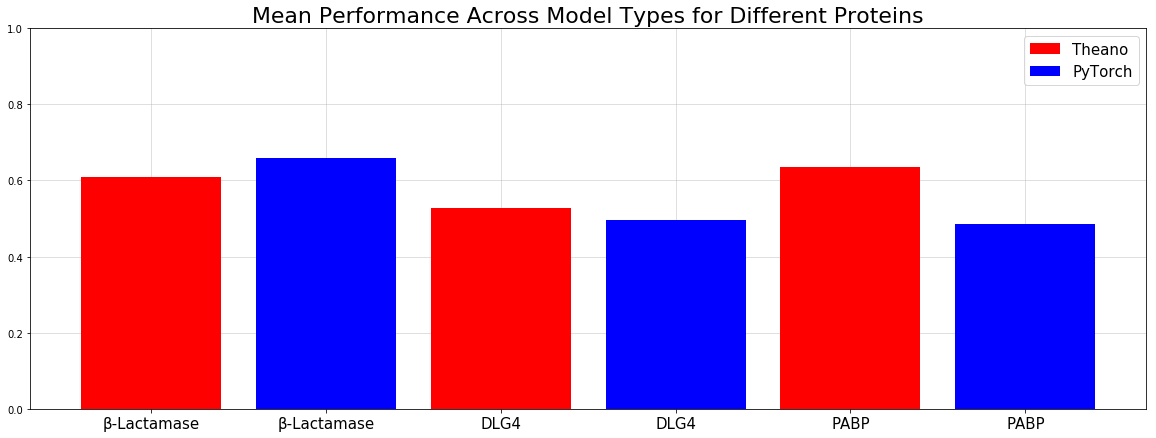

In [182]:
TB_perf = [0.37, 0.56, 0.53, 0.74, 0.73, 0.73] 
TD_perf = [0.41, 0.50, 0.55, 0.55, 0.57, 0.58]
TP_perf = [0.58, 0.63, 0.64, 0.65, 0.65, 0.67]

PB_perf = [0.69, 0.69, 0.60, 0.68, 0.65, 0.65]
PD_perf = [0.55, 0.55, 0.47, 0.45, 0.48, 0.47]
PP_perf = [0.57, 0.62, 0.42, 0.41, 0.44, 0.45]

fig, ax = plt.subplots(figsize=(20,7))
ax.bar([1,3,5],[np.mean(TB_perf),np.mean(TD_perf),np.mean(TP_perf)],label='Theano',color='r')
ax.bar([2,4,6],[np.mean(PB_perf),np.mean(PD_perf),np.mean(PP_perf)],label='PyTorch',color='b')
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(['β-Lactamase','β-Lactamase','DLG4','DLG4','PABP','PABP'],fontsize=15)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.5)
ax.set_ylim((0,1))
plt.title("Mean Performance Across Model Types for Different Proteins",fontsize=22)
plt.legend(fontsize=15)
plt.show()

Overall, it is seems that the models are not performing exactly the same. On average, the PyTorch model fails to achieve as high Spearman R agreement with experimental data - especially in the SVI format, which is considered the model's full format.

# Overall Comparison

Exactly how and why the models are performing differently is not clear. Firstly, the optimization problem is a strongly non-convex problem, and so multiple different minima can be reached through learning. Model construction is thus highly stochastic, and these stochastic aspects make it difficult to pin down whether the difference is due to differences in functionality or due to a bug or mathematical error, which would be more serious.

Unfortunately, time constrainst meant that the models could not be run several times to determine the exact extend to which these models differ. With more time, this would be performed, along with model analysis with stochastic aspects removed (no sampling, etc.) to check the mathematical operations being performed. 

It can be difficult to piece together the different aspects of model performance. However, it is of note that the rate at which the two models optimise the variational parameters is different. The PyTorch model more rapidly reaches the lower bound of this loss, and this may lead to different values for the other loss components. For example, there may be a subtle difference in the implementation of torch's Adam() module to how the original model implemented Adam updates - this might cause quicker learning with respect to variational parameters, at the cost of arriving at a less optimal final loss location. More rapidly learning variational parameters might inhibit the model's ability to learn the other losses successfully.

To test the idea that learning rate difference might contribute to differing performances, the torch model was re-run with a learning rate decrease four-fold to 0.00025. The results are below.

In [194]:
path = "../data/outputs/BLAT_ECOLX/lrslow_svi.out"
SLfile = open(path,'r')
pt_slow = SLfile.readlines()[18:]
PS_epochs = [int(line.split()[1].replace(".","")) for line in pt_slow]
PS_LB = [float(line.split()[4].replace(",","")) for line in pt_slow]
PS_params = [float(line.split()[6].replace(",","")) for line in pt_slow]
PS_latent = [float(line.split()[8].replace(",","")) for line in pt_slow]
PS_recon = [float(line.split()[10].replace(",","")) for line in pt_slow]

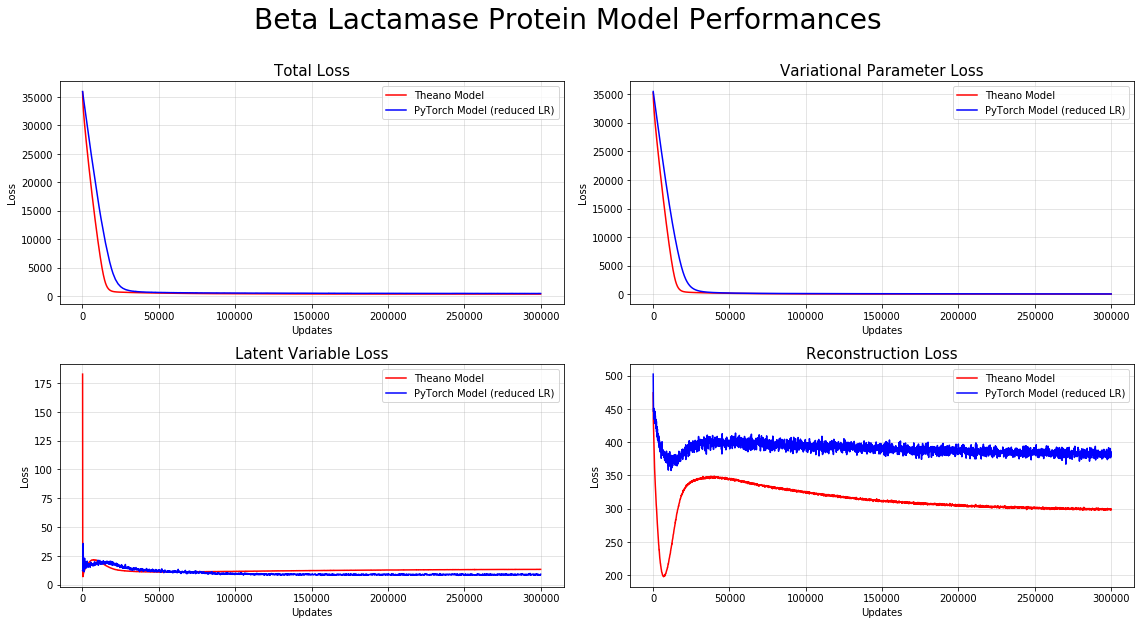

In [198]:
plt.figure(figsize=(16,8))
plt.suptitle("Beta Lactamase Protein Model Performances ", fontsize=28, y=1.08)
plt.subplot(2,2,1)
plt.plot(TB_epochs,-np.array(TB_LB), color='r', label="Theano Model")
plt.plot(PS_epochs,np.array(PS_LB), color='b', label='PyTorch Model (reduced LR)')
plt.legend()
plt.title("Total Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.subplot(2,2,2)
plt.plot(TB_epochs,-np.array(TB_params), color='r', label="Theano Model")
plt.plot(PS_epochs,-np.array(PS_params), color='b', label='PyTorch Model (reduced LR)')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Variational Parameter Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,3)
plt.plot(TB_epochs,-np.array(TB_latent), color='r', label="Theano Model")
plt.plot(PS_epochs,-np.array(PS_latent), color='b', label='PyTorch Model (reduced LR)')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Latent Variable Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.subplot(2,2,4)
plt.plot(TB_epochs,-np.array(TB_recon), color='r', label="Theano Model")
plt.plot(PS_epochs,-np.array(PS_recon), color='b', label='PyTorch Model (reduced LR)')
plt.legend()
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.title("Reconstruction Loss", fontsize=15)
plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()

The PyTorch model now learns more slowly than the original model. Still the models are not performing equivalently, but the performances are closer than with the original PyTorch learning rate. Compared to the Theano model's Spearman R value of 0.73, the PyTorch model's score improves from 0.65 to 0.68 with this change.

Clearly, however this is not the fundamental cause of the difference in performance. Overall, we can say that the new model is functioning, but is not yet fully synchronised in behaviour with the original model. Why this might be is considered in [conclusions](conclusions.html).